In [22]:
# Now we want to create particles,
# p[i] = robot(). In this assignment, write
# code that will assign 1000 such particles
# to a list.
#
# Your program should print out the length
# of your list (don't cheat by making an
# arbitrary list of 1000 elements!)
#
# Don't modify the code below. Please enter
# your code at the bottom.

from math import *
import random


landmarks  = [[20.0, 20.0], [80.0, 80.0], [20.0, 80.0], [80.0, 20.0]]
world_size = 100.0


class robot:
    def __init__(self):
        self.x = random.random() * world_size
        self.y = random.random() * world_size
        self.orientation = random.random() * 2.0 * pi
        self.forward_noise = 0.0;
        self.turn_noise    = 0.0;
        self.sense_noise   = 0.0;
    
    def set(self, new_x, new_y, new_orientation):
        if new_x < 0 or new_x >= world_size:
            raise (ValueError, 'X coordinate out of bound')
        if new_y < 0 or new_y >= world_size:
            raise (ValueError, 'Y coordinate out of bound')
        if new_orientation < 0 or new_orientation >= 2 * pi:
            raise (ValueError, 'Orientation must be in [0..2pi]')
        self.x = float(new_x)
        self.y = float(new_y)
        self.orientation = float(new_orientation)
    
    
    def set_noise(self, new_f_noise, new_t_noise, new_s_noise):
        # makes it possible to change the noise parameters
        # this is often useful in particle filters
        self.forward_noise = float(new_f_noise);
        self.turn_noise    = float(new_t_noise);
        self.sense_noise   = float(new_s_noise);
    
    
    def sense(self):
        Z = []
        for i in range(len(landmarks)):
            dist = sqrt((self.x - landmarks[i][0]) ** 2 + (self.y - landmarks[i][1]) ** 2)
            dist += random.gauss(0.0, self.sense_noise)
            Z.append(dist)
        return Z
    
    
    def move(self, turn, forward):
        if forward < 0:
            raise (ValueError, 'Robot cant move backwards')
        
        # turn, and add randomness to the turning command
        orientation = self.orientation + float(turn) + random.gauss(0.0, self.turn_noise)
        orientation %= 2 * pi
        
        # move, and add randomness to the motion command
        dist = float(forward) + random.gauss(0.0, self.forward_noise)
        x = self.x + (cos(orientation) * dist)
        y = self.y + (sin(orientation) * dist)
        x %= world_size    # cyclic truncate
        y %= world_size
        
        # set particle
        res = robot()
        res.set(x, y, orientation)
        res.set_noise(self.forward_noise, self.turn_noise, self.sense_noise)
        return res
    
    def Gaussian(self, mu, sigma, x):
        
        # calculates the probability of x for 1-dim Gaussian with mean mu and var. sigma
        return exp(- ((mu - x) ** 2) / (sigma ** 2) / 2.0) / sqrt(2.0 * pi * (sigma ** 2))
    
    
    def measurement_prob(self, measurement):
        
        # calculates how likely a measurement should be
        
        prob = 1.0;
        for i in range(len(landmarks)):
            dist = sqrt((self.x - landmarks[i][0]) ** 2 + (self.y - landmarks[i][1]) ** 2)
            prob *= self.Gaussian(dist, self.sense_noise, measurement[i])
        return prob
    
    def __repr__(self):
        return '[x=%.6s y=%.6s orient=%.6s]' % (str(self.x), str(self.y), str(self.orientation))


#myrobot = robot()
#myrobot.set_noise(5.0, 0.1, 5.0)
#myrobot.set(30.0, 50.0, pi/2)
#myrobot = myrobot.move(-pi/2, 15.0)
#print myrobot.sense()
#myrobot = myrobot.move(-pi/2, 10.0)
#print myrobot.sense()

####   DON'T MODIFY ANYTHING ABOVE HERE! ENTER CODE BELOW ####

N = 1000
p = []

#enter code here
for i in range(1000):
    p.append(robot());
print (len(p))


1000


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

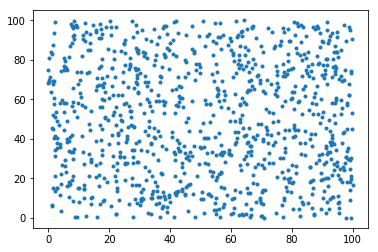

In [24]:
x=[]
y=[]
for i in range(len(p)):
    x.append(p[i].x)
    y.append(p[i].y)
fig, ax =plt.subplots(1)
ax.plot(x,y,'.')